CALORIES PREDECTION

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

In [3]:
#LOAD DATASET
df = pd.read_csv(r"C:\Users\srava\Downloads\calories.csv")
df
print("First 5 rows of dataset:",df.head())

# EDA
print("\nEDA Info:", df.info())
print("\nStatistical Description:", df.describe())
print("\nMissing Values:", df.isnull().sum())

First 5 rows of dataset:     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  


SIMPLE LINEAR REGRESSION (1-Feature)
MAE: 13.6135
MSE: 345.0410
RMSE: 18.5753
R²: 0.9145


c:\Users\srava\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


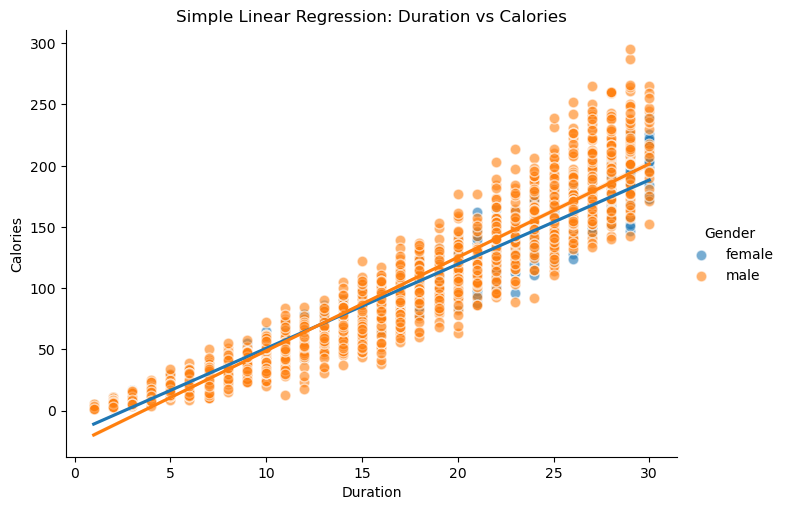


kNN REGRESSION
RMSE: 17.9162
R^2: 0.9205

DECISION TREE REGRESSION
RMSE: 16.5915
R^2: 0.9318

kNN CLASSIFICATION
Accuracy: 0.9637
Confusion Matrix:
 [[1425   69]
 [  40 1466]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1494
           1       0.96      0.97      0.96      1506

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000


DECISION TREE CLASSIFICATION
Accuracy: 0.9577
Confusion Matrix:
 [[1430   64]
 [  63 1443]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      1494
           1       0.96      0.96      0.96      1506

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



In [9]:

# --- REGRESSIONS ---

# Features & target
X = df[['Duration']]
y = df['Calories']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for Regression (Required for kNN)
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)
X_test_scaled = scaler_reg.transform(X_test)

# 1. Simple Linear Regression
slr = LinearRegression()
slr.fit(X_train, y_train)
y_pred_slr = slr.predict(X_test)

print("\nSIMPLE LINEAR REGRESSION (1-Feature)")
print(f"MAE: {mean_absolute_error(y_test, y_pred_slr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_slr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_slr)):.4f}")
print(f"R²: {r2_score(y_test, y_pred_slr):.4f}")

# Regression with Groups (Visual)
plot_data = X_test.copy()
plot_data['Calories'] = y_test
plot_data['Gender'] = df.loc[X_test.index, 'Gender']
sns.lmplot(
    data=plot_data, x='Duration', y='Calories', hue='Gender', height=5, aspect=1.4,
    scatter_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'white'}
)
plt.title("Simple Linear Regression: Duration vs Calories")
plt.show()

# 2. kNN Regression
# FIX: Use X_train_scaled and y_train (not y_train_reg)
knn_r = KNeighborsRegressor(n_neighbors=5)
knn_r.fit(X_train_scaled, y_train)
y_pred_knn_r = knn_r.predict(X_test_scaled)

print("\nkNN REGRESSION")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn_r)):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_knn_r):.4f}")

# 3. Decision Tree Regression
# FIX: Use X_train_scaled and y_train
dt_r = DecisionTreeRegressor(random_state=42)
dt_r.fit(X_train_scaled, y_train)
y_pred_dt_r = dt_r.predict(X_test_scaled)

print("\nDECISION TREE REGRESSION")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_dt_r)):.4f}")
print(f"R^2: {r2_score(y_test, y_pred_dt_r):.4f}")


# --- CLASSIFICATION ---

# Convert Calories to binary class
df['Calories_Class'] = (df['Calories'] >= df['Calories'].median()).astype(int)

X_cls = df[['Duration', 'Heart_Rate', 'Body_Temp']]
y_cls = df['Calories_Class']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Scaling for classification
scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

# 1. kNN Classification
knn_c = KNeighborsClassifier(n_neighbors=5)
knn_c.fit(X_train_cls_scaled, y_train_cls)
y_pred_knn_c = knn_c.predict(X_test_cls_scaled)

print("\nkNN CLASSIFICATION")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_knn_c):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_knn_c))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_knn_c))

# 2. Decision Tree Classification
dt_c = DecisionTreeClassifier(random_state=42)
dt_c.fit(X_train_cls_scaled, y_train_cls)
y_pred_dt_c = dt_c.predict(X_test_cls_scaled)

print("\nDECISION TREE CLASSIFICATION")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_dt_c):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_dt_c))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_dt_c))


GAUSSIAN NAIVE BAYES CLASSIFICATION
Accuracy: 0.9613
Confusion Matrix:
 [[1410   84]
 [  32 1474]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96      1494
           1       0.95      0.98      0.96      1506

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



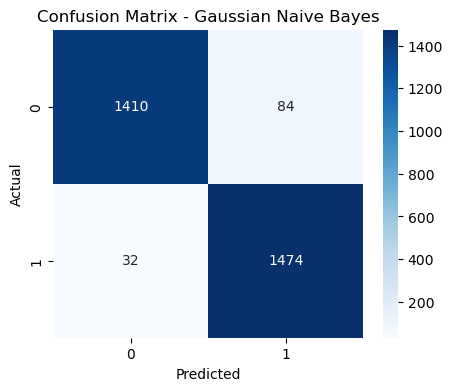

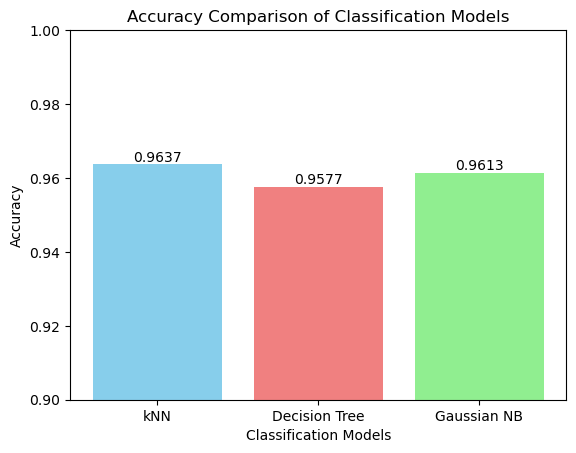

In [10]:
# --- GAUSSIAN NAIVE BAYES ---
gnb = GaussianNB()
gnb.fit(X_train_cls_scaled, y_train_cls)
y_pred_gnb = gnb.predict(X_test_cls_scaled)

print("\nGAUSSIAN NAIVE BAYES CLASSIFICATION")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_gnb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test_cls, y_pred_gnb))

# Confusion Matrix Visualization for Gaussian Naive Bayes
plt.figure(figsize=(5,4))
# FIX: Changed color='blue' (invalid for seaborn) to cmap='Blues'
sns.heatmap(confusion_matrix(y_test_cls, y_pred_gnb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

# Accuracy Comparsion Chart
models = ['kNN', 'Decision Tree', 'Gaussian NB']
accuracies = [
    accuracy_score(y_test_cls, y_pred_knn_c),
    accuracy_score(y_test_cls, y_pred_dt_c),
    accuracy_score(y_test_cls, y_pred_gnb)
]

plt.figure()
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylim(0.90, 1)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Classification Models")

# Display accuracy values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f"{acc:.4f}", ha='center', va='bottom')

plt.show()

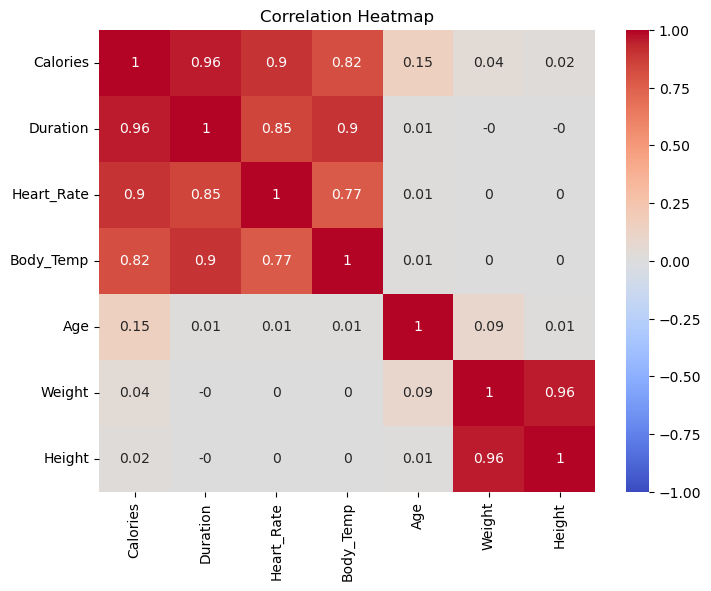

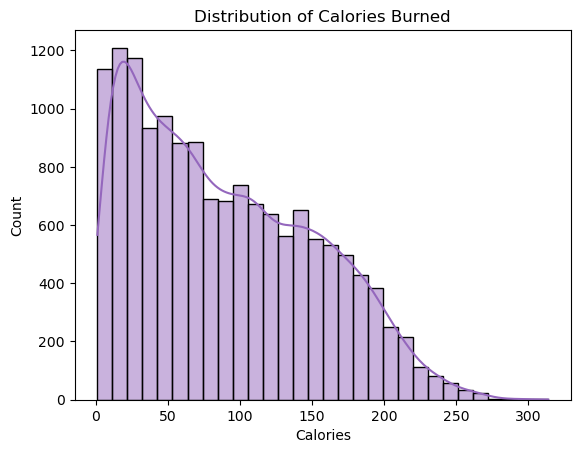

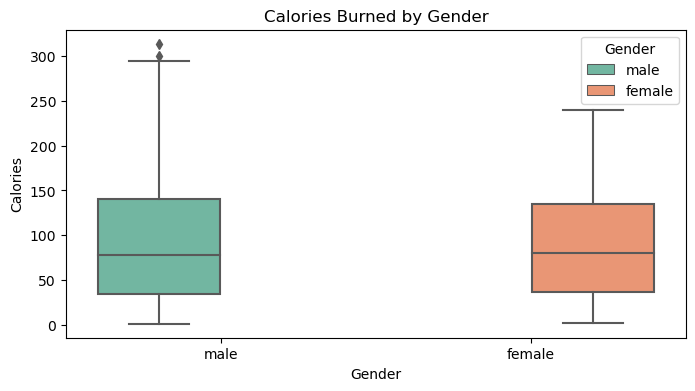

In [11]:
# Correlation Matrix
numeric_cols = ["Calories", "Duration", "Heart_Rate", "Body_Temp", "Age", "Weight", "Height"]
corr = df[numeric_cols].corr().round(2)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=ax)
ax.set_title("Correlation Heatmap")
plt.show()

#Distribution of Calories Burned
fig, ax = plt.subplots()
sns.histplot(df["Calories"], bins=30, kde=True, ax=ax, color="#9467bd")
ax.set_title("Distribution of Calories Burned")
plt.show()

#Bivariate: Gender vs Calories (Box Plot)
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df, x="Gender", y="Calories", palette="Set2", hue="Gender", ax=ax)
ax.set_title("Calories Burned by Gender")
plt.show()